**An individual starts moving from position zero and takes steps of length +1 and -1 with probabilities of occurrence 80% and 20% respectively. Steps of length -1 are only allowed if the individual does not end up at a position less than zero.**

**a) Write a program that calculates the individual's movement and instantaneous position in the first 100 steps. Plot the motion diagram of this individual. Are the program results consistent with theoretical calculations? Explain.**

In [18]:
import numpy as np
from scipy.stats import norm, exponweib
import scipy.stats as st
import random
from matplotlib import pyplot as plt

dist_names = ["norm", "exponweib"]
repeat_count = 10**6
goal_step_count = 100
goal_position = 100
forward_step_prob = 0.8

In [13]:
def get_distribution_params(data, dist_names = dist_names):
    dist_results = []
    params = {}

    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param

        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)

        dist_results.append((dist_name, p, param))

    return dist_results

In [5]:
def show_results(params):
    plt.hist(f, bins=40, density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, goal_step_count)

    p = norm.pdf(x, *params[0][2])
    plt.plot(x, p, 'r', linewidth=2, label="Norm")

    p = exponweib.pdf(x, *params[1][2])
    plt.plot(x, p, 'k', linewidth=2, label="ExponWeib")

    plt.legend(loc="upper left")
    plt.show()

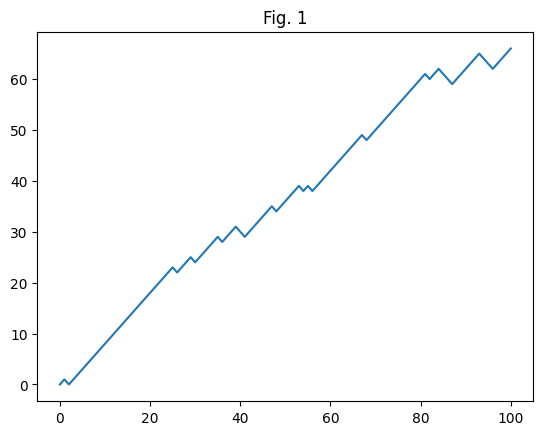

In [8]:
step = 0
history = [0]
for i in range(0, goal_step_count):
    p = random.uniform(0, 1)
    if step == 0 or p < forward_step_prob:
        step += 1
    else:
        step -= 1
    history.append(step)

plt.title("Fig. 1")
plt.plot(history)
plt.show()

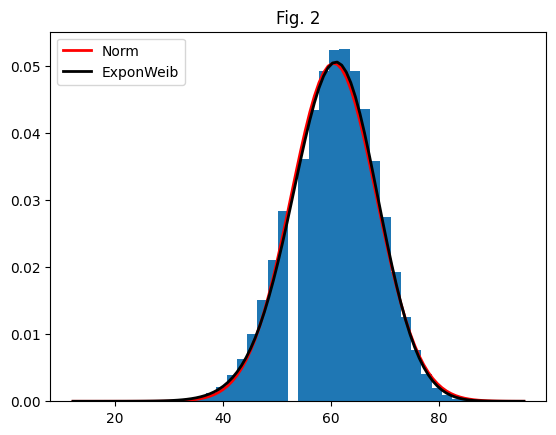

In [9]:
f = []
for i in range (0, repeat_count):
    step = 0
    for j in range(0, goal_step_count):
        p = random.uniform(0, 1)
        if step == 0 or p < forward_step_prob:
            step += 1
        else:
            step -= 1

    f.append(step)

plt.title("Fig. 2")
params = get_distribution_params(f)
show_results(params)

By calculating the mathematical expectation of the probability of moving forward and the probability of moving backward, the average distance from the origin after 100 steps of motion can be obtained. Fig. 1 shows an example of the individual's motion. The probability distribution function of the distance from the starting point is also observable in Fig. 2.

$P(step = +1) = 0.8$

$P(step = -1) = 0.2$

$E(distance in 100 steps) = 100 × P(step = +1) × (+1) + 100 × P(step = -1) × (-1)
= 100 × 0.8 × (+1) + 100 × 0.2 × (-1) = 60$

It is observed that the calculated average distance is consistent with the value obtained in Fig. 2. Also in this figure, the normal and Weibull distributions are plotted and the Kolmogorov-Smirnov test is performed for both. The mentioned distributions are estimated to be acceptable for the obtained data. The slight difference between the obtained mean value (60) and the calculated value above, can be due to the fact that the first step must necessarily be forward. Also, if the first step is forward, the next two steps cannot be backward, and so on for the other upcoming steps. Due to the mentioned reason, the mean value obtained after running the program is slightly higher than the calculated value above.

**b) Calculate after how many steps the individual will reach a position 100 away from the starting point.**

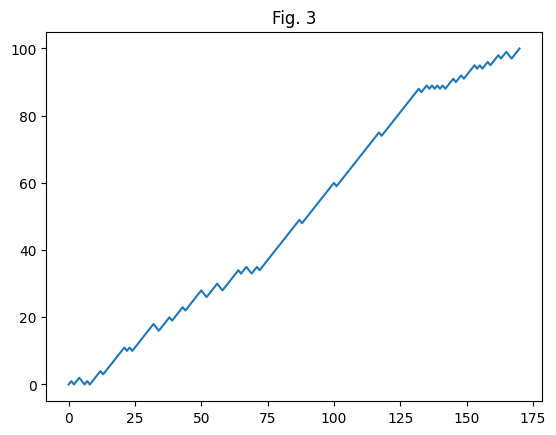

In [22]:
step = 0
history = [0]
while True:
    p = random.uniform(0, 1)
    if step == 0 or p < forward_step_prob:
        step += 1
    else:
        step -= 1
    history.append(step)

    if step >= goal_position:
        break

plt.title("Fig. 3")
plt.plot(history)
plt.show()

An example of how the individual moves until reaching a distance of 100 from the starting point and the fitted distribution functions can be seen in Fig. 3. The average number of steps taken by the individual to reach a distance of 100 from the origin will be examined in part c.

**c) Plot the probability distribution of the number of steps required to reach a position 100 away from the starting point. Is the resulting plot justifiable based on statistical discussions? Explain.**

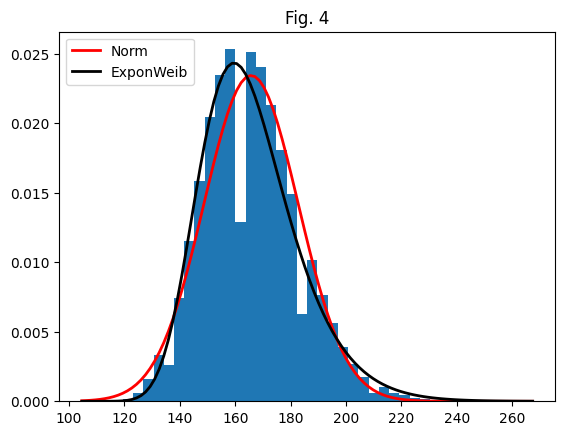

In [28]:
f = []
for i in range(0, repeat_count):
    step = 0
    j = 0
    while step < goal_step_count:
        p = random.uniform(0, 1)
        if step == 0 or p < forward_step_prob:
            step += 1
        else:
            step -= 1
        j += 1

    f.append(j)

plt.title("Fig. 4")
params = get_distribution_params(f)
show_results(params)

By calculating the mathematical expectation of the probability of moving forward and the probability of moving backward, the average number of steps required to reach a distance of 100 from the starting point can be obtained. Figure 4 shows the probability distribution plot for this discussion.

$P(step = +1) = 0.8$

$P(step = -1) = 0.2$

$100 = P(step = +1) × steps × (+1) + P(step = -1) × steps × (-1)
= 0.8 × steps × (+1) + 0.2 × steps × (-1)$

$→ steps = 167$

It is observed that the average number of steps obtained in the calculations above is consistent with the value obtained in Fig. 4. In this figure too, the normal and Weibull distributions are plotted and the Kolmogorov-Smirnov test is performed. The mentioned distributions are estimated to be acceptable for the obtained data. The parameters of these distributions can be seen in the appendix.

**d) Assume if two consecutive steps are +1, the next step will be +2. Obtain the objective of part c based on these assumptions.**

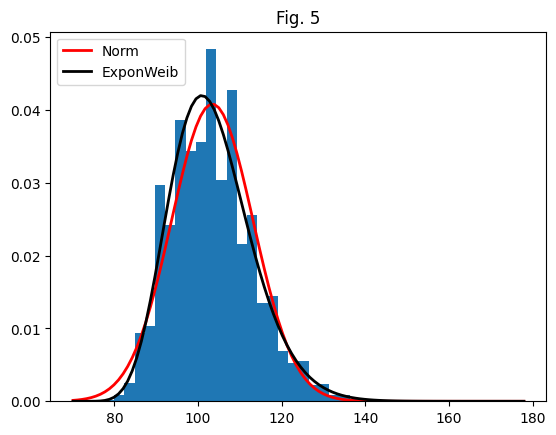

In [16]:
f = []
for j in range(0, repeat_count):
    forward_1_count = 0
    step = 0
    i = 0
    while step < goal_step_count:
        if forward_1_count == 2:
            step += 2
            forward_1_count = 0
        else:
            p = random.uniform(0, 1)
            if step == 0 or p < forward_step_prob:
                step += 1
                forward_1_count += 1
            else:
                step -= 1
                forward_1_count = 0
        i += 1

    f.append(i)

plt.title("Fig. 5")
params = get_distribution_params(f)
show_results(params)

In this part as well, similar to the previous part, the normal and Weibull distributions are plotted. Both distributions are suitable for the obtained data.